In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import random 

In [111]:
df = pd.read_csv('../dataset/metadata.csv')
df

img_path camera_type  pass_no  \
0     train/DataSet_Xtion_RGB_train/000_Corridor1_RG...       Xtion        0   
1     train/DataSet_Xtion_RGB_train/000_Corridor1_RG...       Xtion        0   
2     train/DataSet_Xtion_RGB_train/001_Corridor1_RG...       Xtion        0   
3     train/DataSet_Xtion_RGB_train/001_Corridor1_RG...       Xtion        0   
4     train/DataSet_Xtion_RGB_train/002_Corridor1_RG...       Xtion        0   
...                                                 ...         ...      ...   
3301  test/DataSet_P40PRO_RGB_test3/078_F107_RGB_000...      P40PRO        3   
3302  test/DataSet_P40PRO_RGB_test3/079_F107_RGB_000...      P40PRO        3   
3303  test/DataSet_P40PRO_RGB_test3/081_F107_RGB_000...      P40PRO        3   
3304  test/DataSet_P40PRO_RGB_test3/082_F107_RGB_000...      P40PRO        3   
3305  test/DataSet_P40PRO_RGB_test3/084_F107_RGB_000...      P40PRO        3   

            location      class   role  split  
0         (0.0, 0.0)  Corridor1     db  train  
1         (0.0, 0.0)  Corridor1     db  train  
2         (1.0, 1.0)  Corridor1     db  train  
3         (1.0, 1.0)  Corridor1     db  train  
4         (2.0, 2.0)  Corridor1     db  train  
...              ...        ...    ...    ...  
3301  (878.0, 878.0)       F107  query   test  
3302  (879.0, 879.0)       F107  query   test  
3303  (881.0, 881.0)       F107  query   test  
3304  (882.0, 882.0)       F107  query   test  
3305  (884.0, 884.0)       F107  query   test  

[3306 rows x 7 columns]

In [112]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   img_path     3306 non-null   str  
 1   camera_type  3306 non-null   str  
 2   pass_no      3306 non-null   int64
 3   location     3306 non-null   str  
 4   class        3306 non-null   str  
 5   role         3306 non-null   str  
 6   split        3306 non-null   str  
dtypes: int64(1), str(6)
memory usage: 180.9 KB


In [113]:
df.head()

img_path camera_type  pass_no  \
0  train/DataSet_Xtion_RGB_train/000_Corridor1_RG...       Xtion        0   
1  train/DataSet_Xtion_RGB_train/000_Corridor1_RG...       Xtion        0   
2  train/DataSet_Xtion_RGB_train/001_Corridor1_RG...       Xtion        0   
3  train/DataSet_Xtion_RGB_train/001_Corridor1_RG...       Xtion        0   
4  train/DataSet_Xtion_RGB_train/002_Corridor1_RG...       Xtion        0   

     location      class role  split  
0  (0.0, 0.0)  Corridor1   db  train  
1  (0.0, 0.0)  Corridor1   db  train  
2  (1.0, 1.0)  Corridor1   db  train  
3  (1.0, 1.0)  Corridor1   db  train  
4  (2.0, 2.0)  Corridor1   db  train

In [114]:
pd.crosstab(df['split'], 'count')

col_0  count
split       
test    1181
train   2125

In [115]:
pd.crosstab(df['pass_no'], df['camera_type'])

camera_type  GOPRO  IPHONE  P40PRO  RobotPiCamera  Xtion
pass_no                                                 
0              425     425     425            425    425
1               83      84      83             81     70
2               83      81      79             73     84
3               81      81      77             76     65

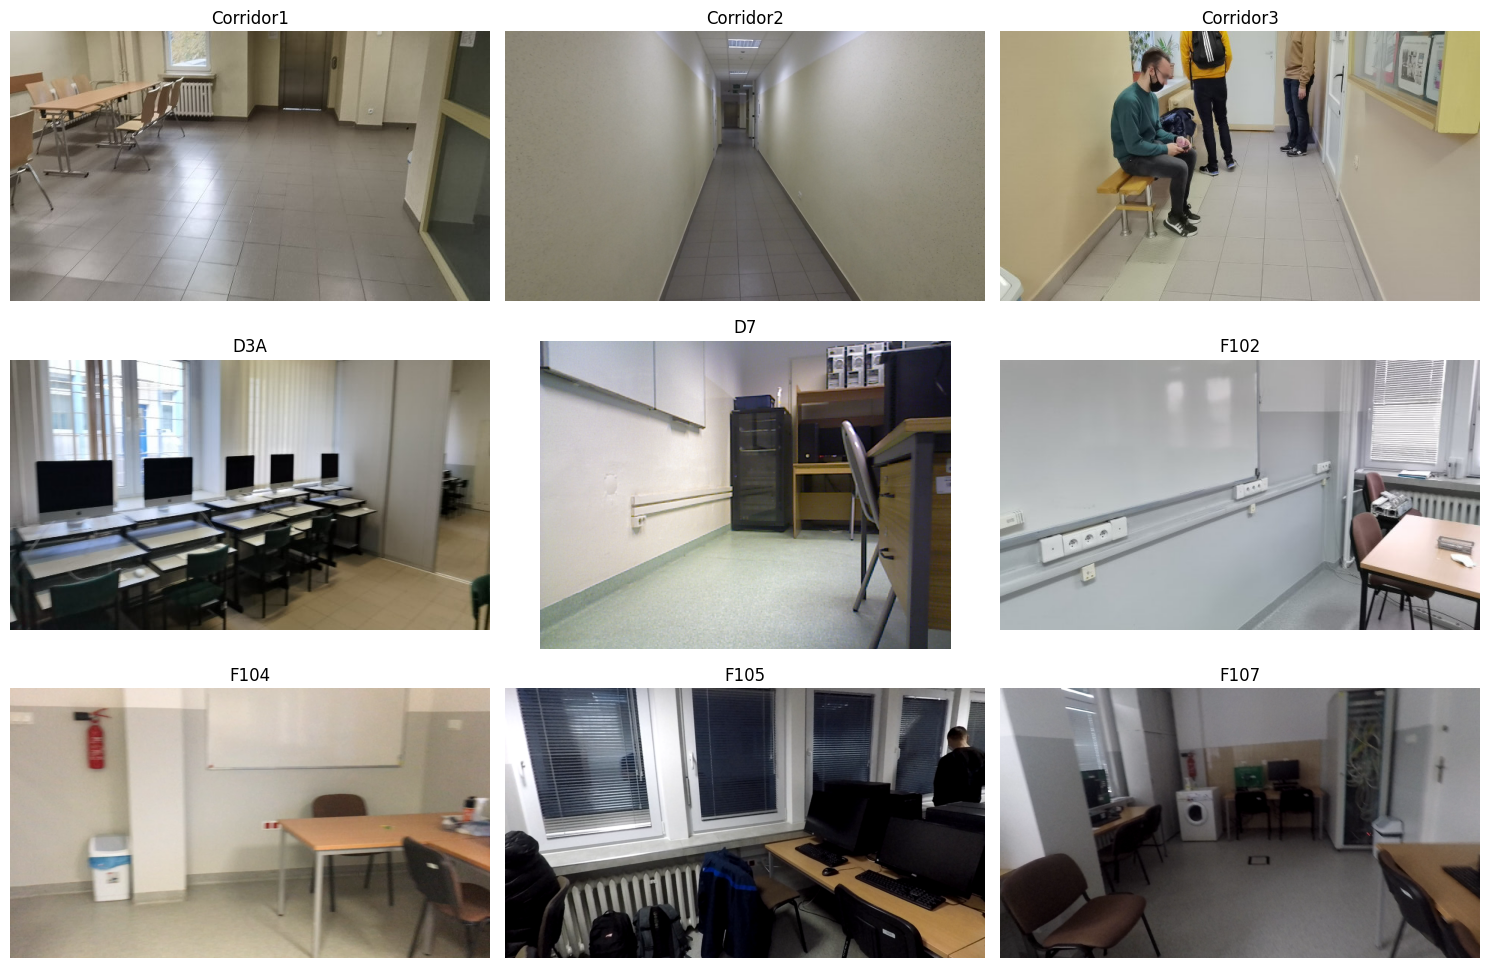

In [116]:
classes = df['class'].unique()
fig, axes = plt.subplots(3, (len(classes)+1)//3, figsize=(15, 10))
axes = axes.flatten()

for i, cls in enumerate(classes):
    sample = df[df['class'] == cls].sample(1).iloc[0]
    filepath = '../dataset/' + sample['img_path']
    axes[i].imshow(plt.imread(filepath))
    axes[i].set_title(f'{cls}')
    axes[i].axis('off')

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

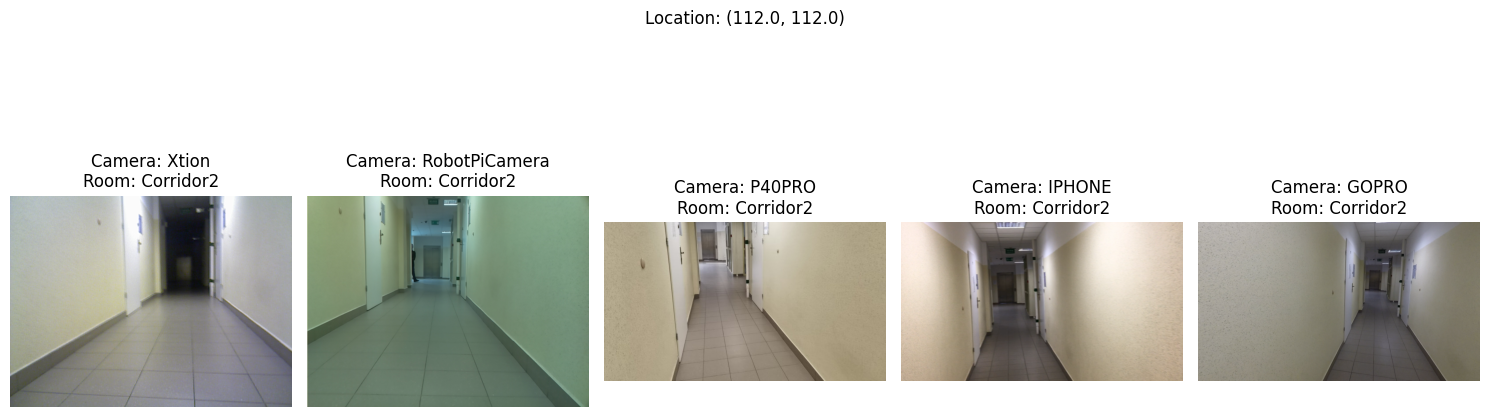

In [117]:
multi_cam_locs = df.groupby('location')['camera_type'].nunique()
multi_cam_locs = multi_cam_locs[multi_cam_locs > 1].index.tolist()

if multi_cam_locs:
    loc = random.choice(multi_cam_locs)
    loc_data = df[df['location'] == loc]
    room_class = loc_data['class'].iloc[0]
    
    cameras = loc_data['camera_type'].unique()
    fig, axes = plt.subplots(1, len(cameras), figsize=(15, 5))
    
    if len(cameras) == 1:
        axes = [axes]
    
    for i, cam in enumerate(cameras):
        sample = loc_data[loc_data['camera_type'] == cam].sample(1).iloc[0]
        filepath = '../dataset/' + sample['img_path']
        axes[i].imshow(plt.imread(filepath))
        axes[i].set_title(f'Camera: {cam}\nRoom: {room_class}')
        axes[i].axis('off')
    
    plt.suptitle(f'Location: {loc}', y=1.05)
    plt.tight_layout()
    plt.show()

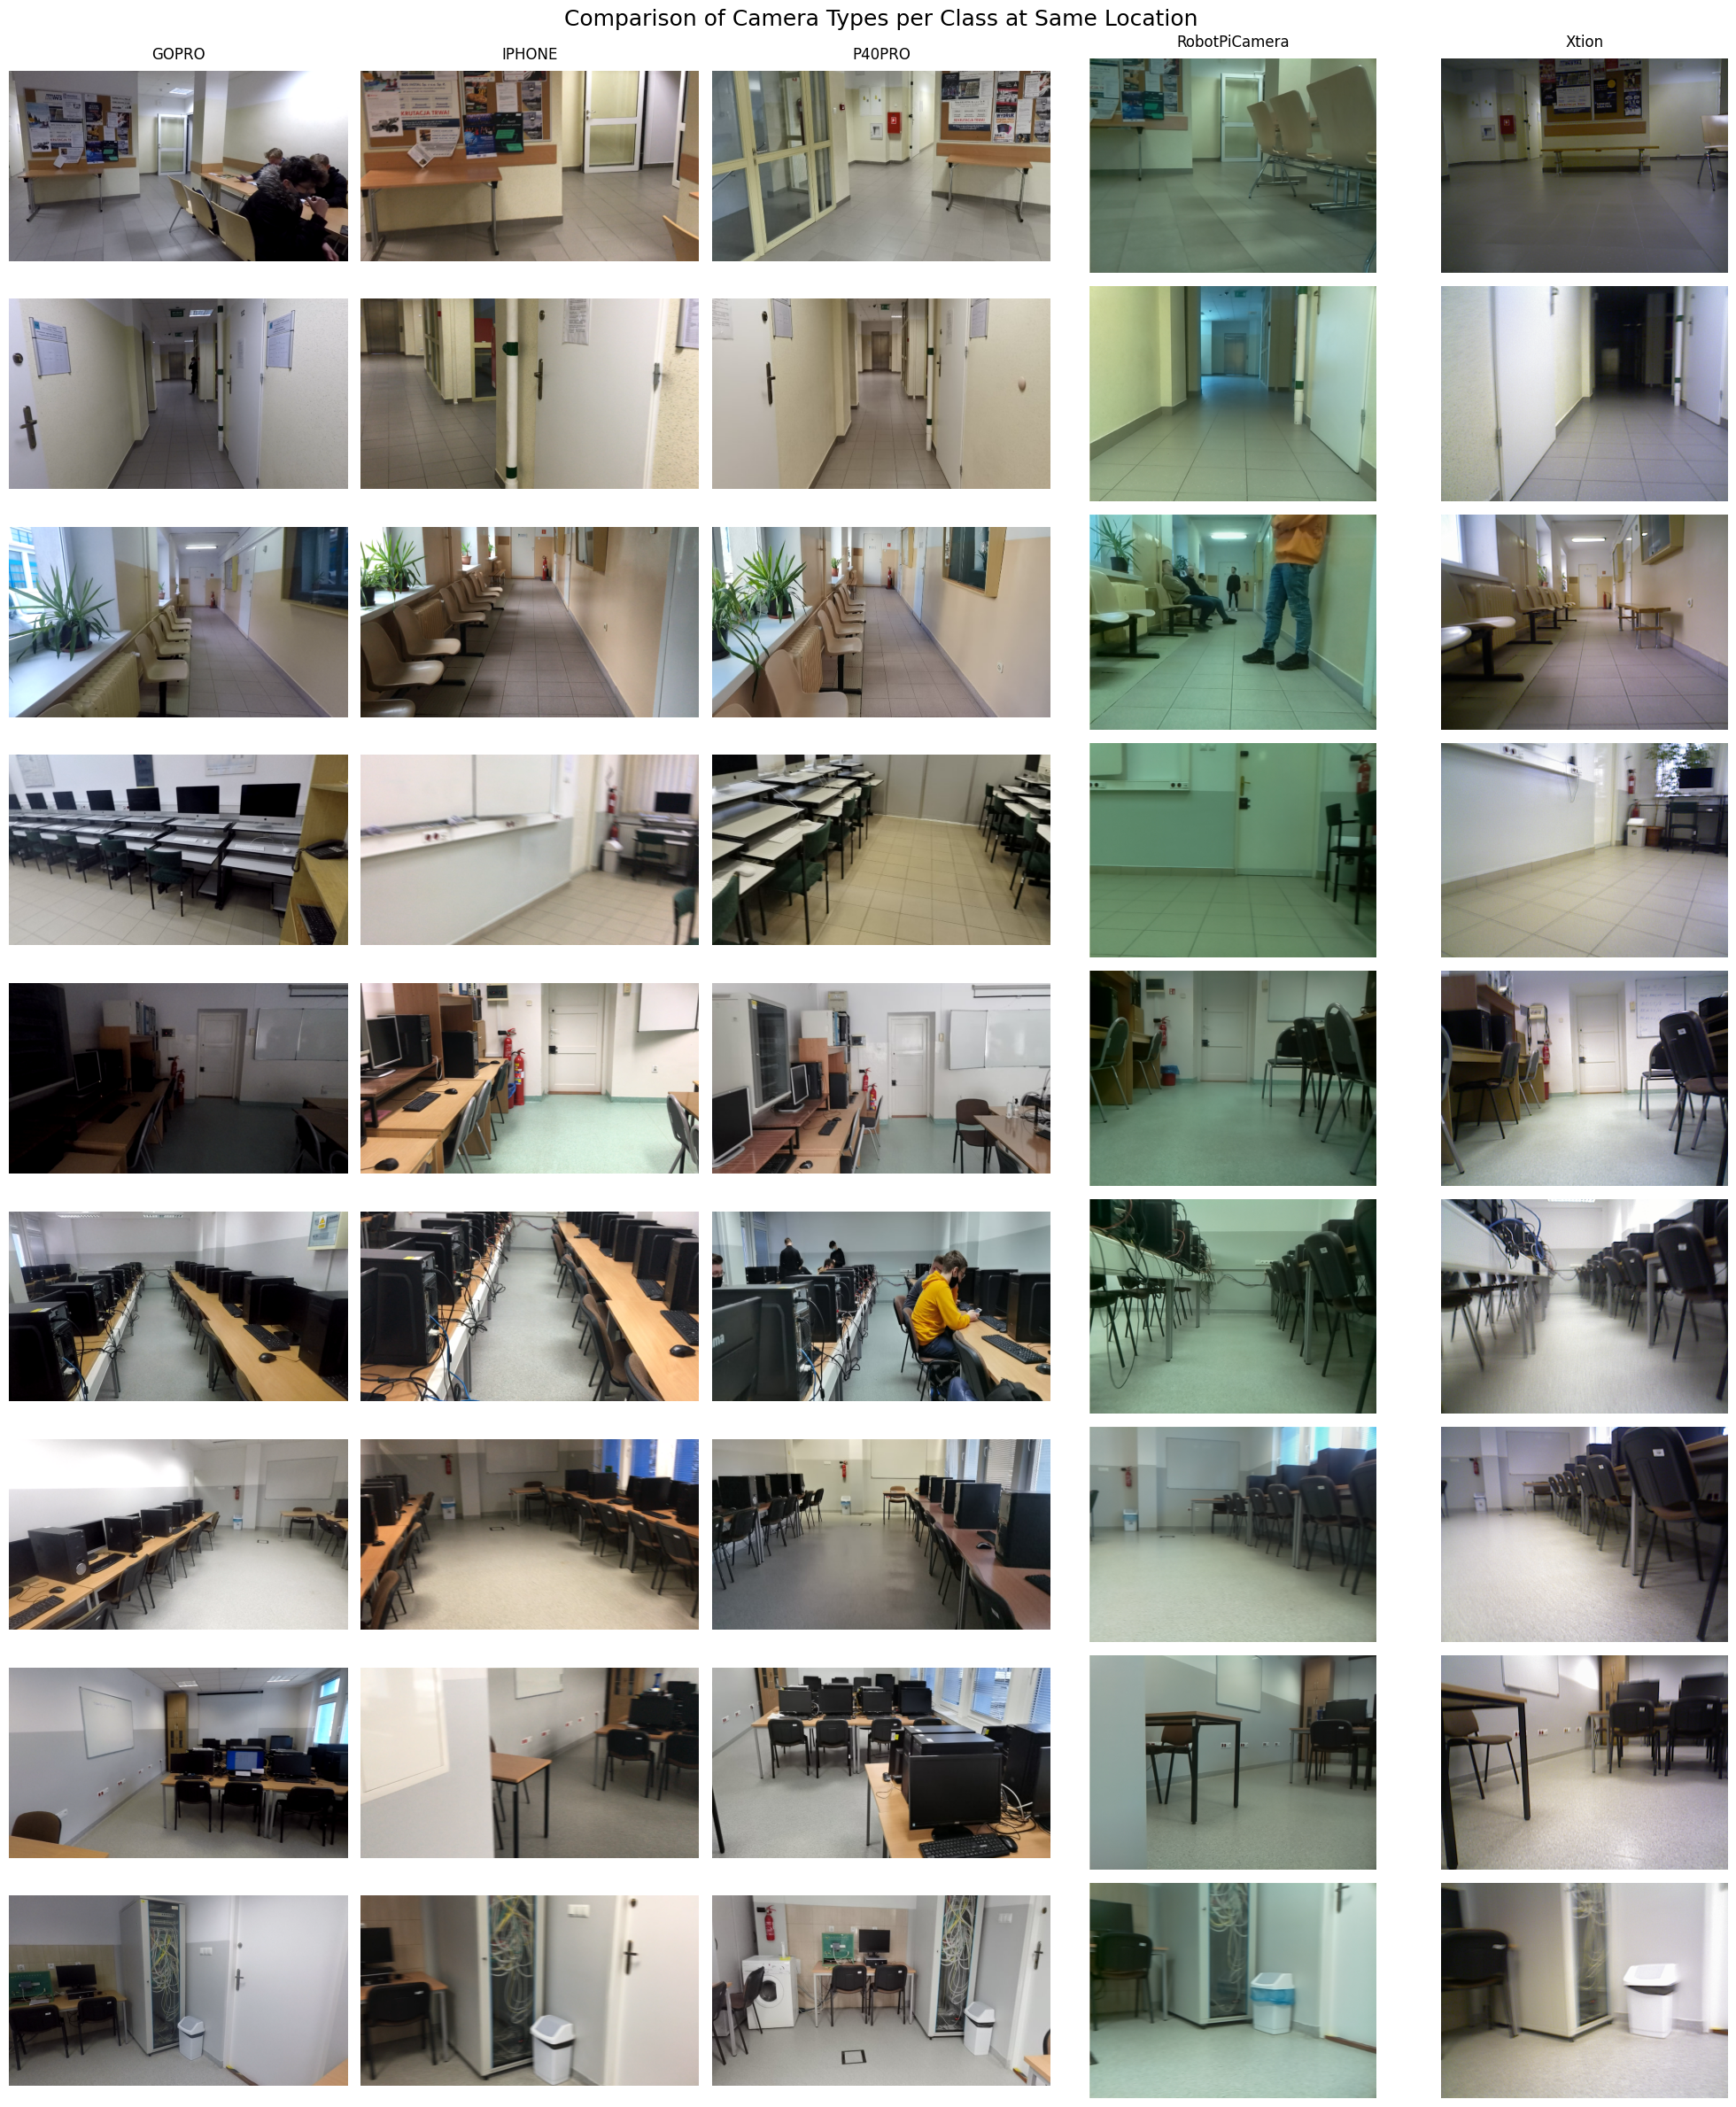

In [118]:
fig, axes = plt.subplots(9, 5, figsize=(20, 25))
fig.subplots_adjust(wspace=0.05, hspace=0.05)

all_cameras = sorted(df['camera_type'].unique())
classes = df['class'].unique()

for i, cls in enumerate(classes):
    class_df = df[df['class'] == cls]
    locations = class_df.groupby('location')['camera_type'].nunique()
    locations = locations[locations > 1].index
    
    if len(locations) > 0:
        loc = random.choice(list(locations))
        loc_data = class_df[class_df['location'] == loc]
        
        for j, cam in enumerate(all_cameras):
            camera_images = loc_data[loc_data['camera_type'] == cam]
            if not camera_images.empty:
                sample = camera_images.sample(1).iloc[0]
                filepath = '../dataset/' + sample['img_path']
                axes[i, j].imshow(plt.imread(filepath))
            axes[i, j].axis('off')
            
            if i == 0:
                axes[i, j].set_title(cam, fontsize=12, pad=10)
            
            if j == 0:
                axes[i, j].set_ylabel(cls, fontsize=12, rotation=0, labelpad=60, va='center')

plt.suptitle('Comparison of Camera Types per Class at Same Location', fontsize=18, y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

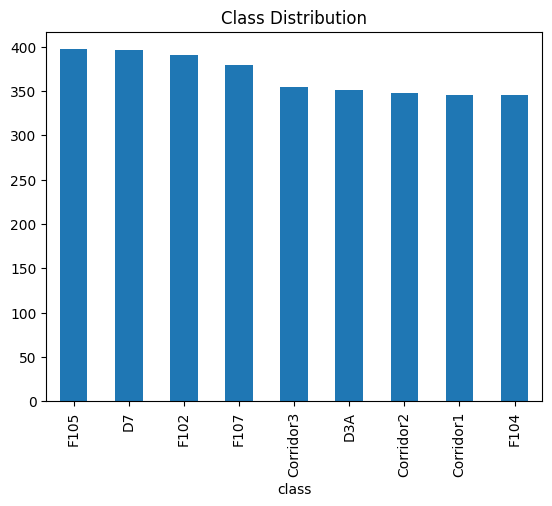

In [119]:
df['class'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.show()

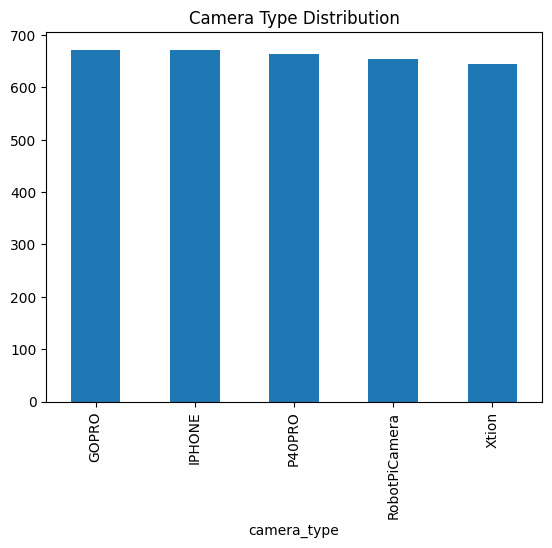

In [120]:
df['camera_type'].value_counts().plot(kind='bar')
plt.title('Camera Type Distribution')
plt.show()

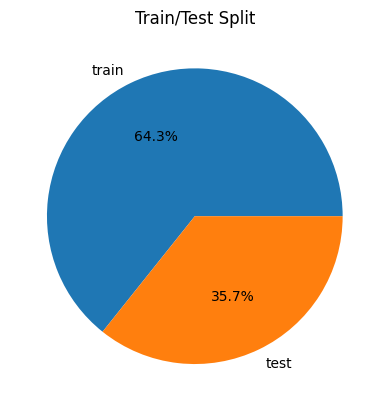

In [121]:
df['split'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Train/Test Split')
plt.show()

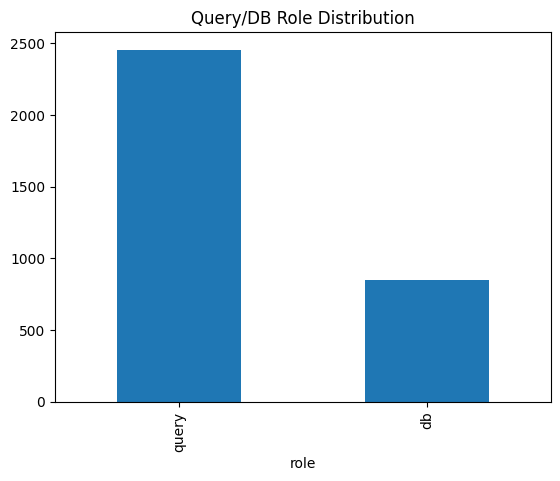

In [122]:
df['role'].value_counts().plot(kind='bar')
plt.title('Query/DB Role Distribution')
plt.show()

In [123]:
pd.crosstab(df['class'], df['split'], margins=True)

split      test  train   All
class                       
Corridor1   120    225   345
Corridor2   123    225   348
Corridor3   129    225   354
D3A         126    225   351
D7          146    250   396
F102        141    250   391
F104        120    225   345
F105        147    250   397
F107        129    250   379
All        1181   2125  3306

In [124]:
pd.crosstab(df['camera_type'], df['split'], margins=True)

split          test  train   All
camera_type                     
GOPRO           247    425   672
IPHONE          246    425   671
P40PRO          239    425   664
RobotPiCamera   230    425   655
Xtion           219    425   644
All            1181   2125  3306

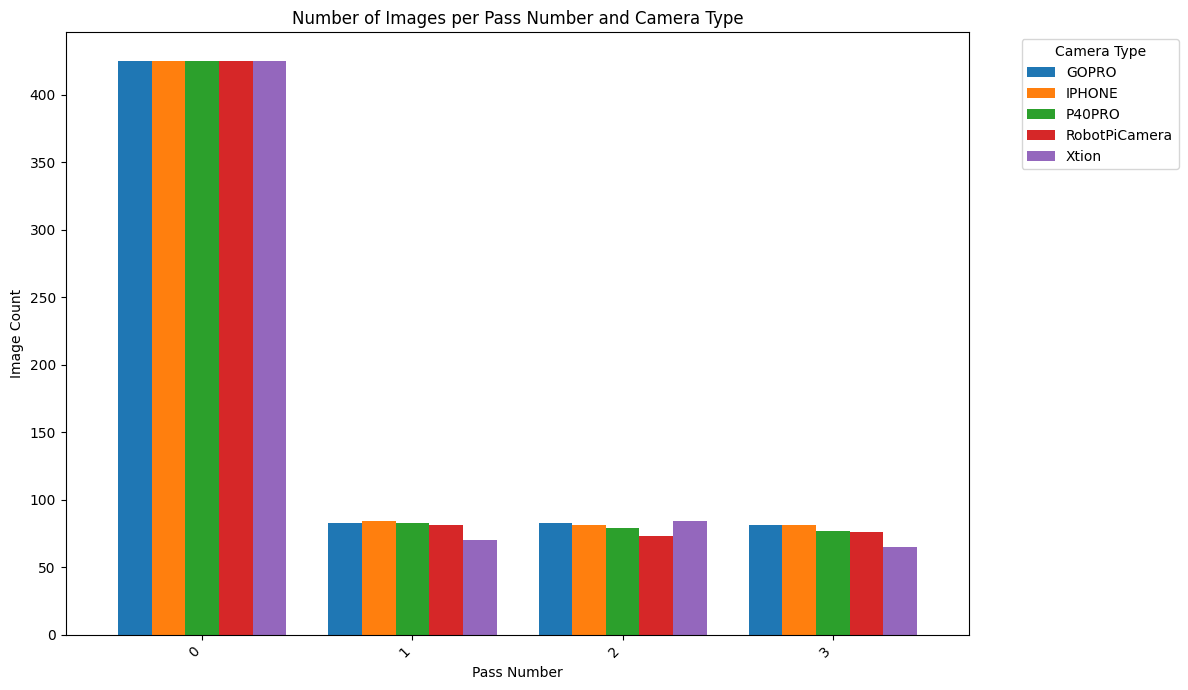

In [125]:
pass_cam_counts = df.groupby(['pass_no', 'camera_type']).size().unstack(fill_value=0)

pass_cam_counts.plot(kind='bar', stacked=False, figsize=(12, 7), width=0.8)
plt.title('Number of Images per Pass Number and Camera Type')
plt.xlabel('Pass Number')
plt.ylabel('Image Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Camera Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

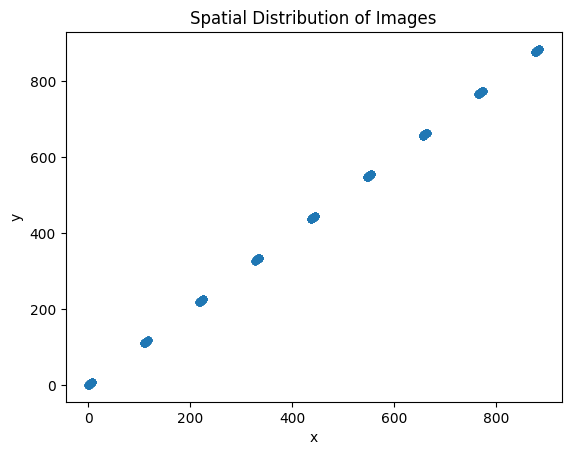

In [126]:
df['location_tuple'] = df['location'].apply(lambda x: tuple(map(float, x.strip('()').split(','))))
coords = df['location_tuple'].apply(pd.Series)
coords.columns = ['x', 'y']
coords.plot.scatter(x='x', y='y', alpha=0.5)
plt.title('Spatial Distribution of Images')
plt.show()

In [127]:
pd.crosstab(df['class'], df['camera_type'], margins=True)

camera_type  GOPRO  IPHONE  P40PRO  RobotPiCamera  Xtion   All
class                                                         
Corridor1       71      71      71             64     68   345
Corridor2       70      71      71             70     66   348
Corridor3       72      72      71             71     68   354
D3A             72      71      69             71     68   351
D7              80      79      78             80     79   396
F102            80      80      79             79     73   391
F104            71      71      70             66     67   345
F105            80      79      79             80     79   397
F107            76      77      76             74     76   379
All            672     671     664            655    644  3306

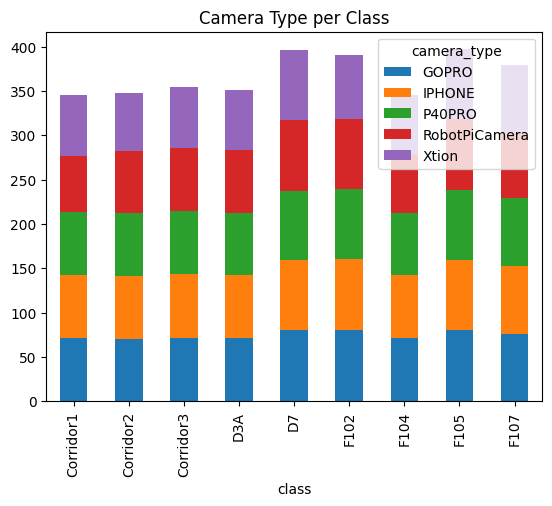

In [128]:
df.groupby('class')['camera_type'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Camera Type per Class')
plt.show()

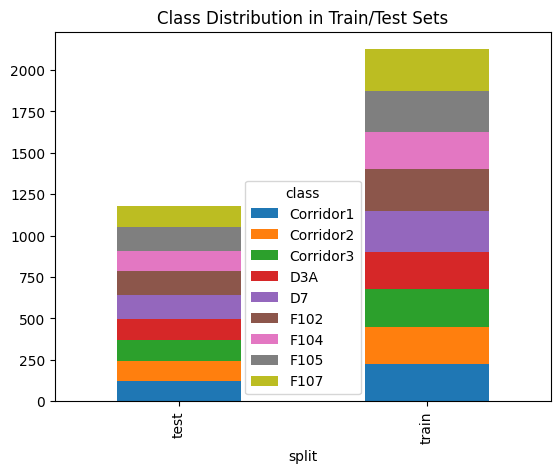

In [129]:
df.groupby('split')['class'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Class Distribution in Train/Test Sets')
plt.show()